# Graphs

The first step is to import the relevant headers. **pyplot** is the workhorse that we will use to perform most of the work. We will also use **image**, **patches** and **collections**. We're also importing numpy and pandas for convenience in data manipulation.

In [1]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

import numpy as np
import pandas as pd

%matplotlib inline

The **%matplotlib inline** magic function indicates to jupyter that we want our matplotlib figures to be embedded directly in the notebook.

Set the default size of all figures to 11x8 inches

In [2]:
plt.rcParams["figure.figsize"] = (11,8)

# Basic plot

For quick and dirty plots, you can just use **plt.plot**. It won't be pretty, but it will get the job done.

In [3]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

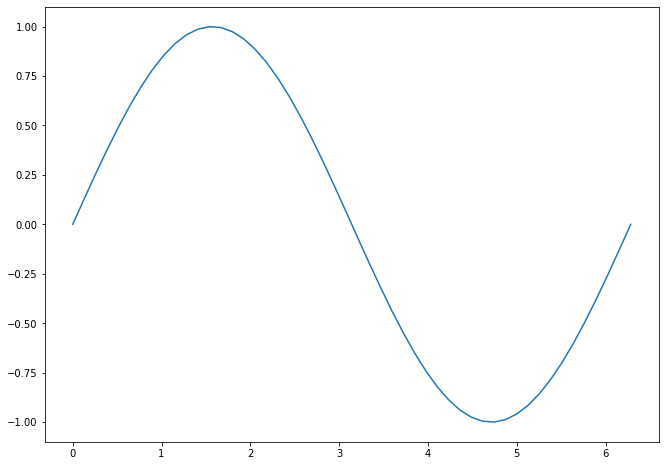

In [4]:
plt.plot(x, y, '-')

Naturally, we can also choose the color of the line to use:

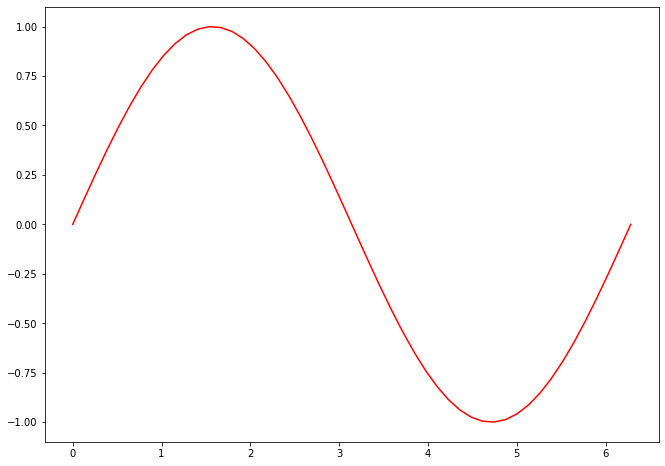

In [5]:
plt.plot(x, y, 'red')

Easily add a legend

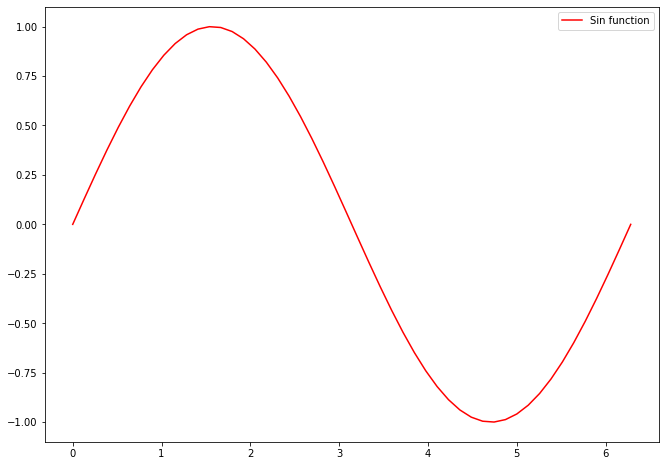

In [6]:
plt.plot(x, y, 'red')
plt.legend(['Sin function'])

Note that for the legend you just need to provide the text, matplotlib takes care of adding the corresponding lines and symbols. More complex plots can be built by calling the plot function multiple times in sequence:

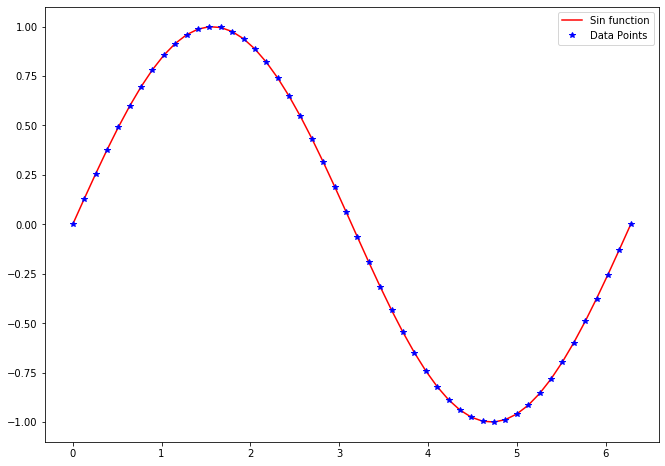

In [7]:
plt.plot(x, y, 'r-')
plt.plot(x, y, 'b*')
plt.legend(['Sin function', 'Data Points'])

# Scatter plot

Let's do something slightly more serious. We start by loading some data from a csv file using **pandas**.

Marriage age data:

In [8]:
ages = pd.read_csv('data/ages.csv')

Let's take a quick look at the data to make sure it is correct.

In [9]:
ages.head()

,Wife,Husband
0,43,49
1,28,25
2,30,40
3,57,52
4,52,58


Here we make a simple scatter plot using the (**plt.scatter***) function. Axis labels are set and the figure is saved to disk at a 300dpi resolution.

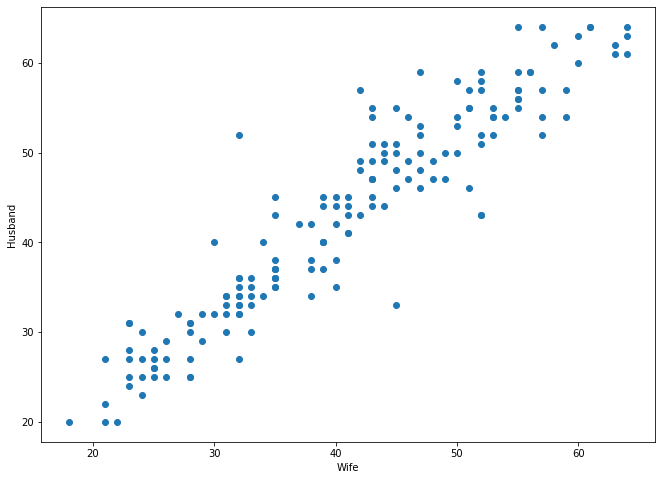

In [10]:
plt.scatter(ages['Wife'], ages['Husband'])
plt.xlabel("Wife")
plt.ylabel("Husband")
plt.savefig('data/ages.png', dpi=300)

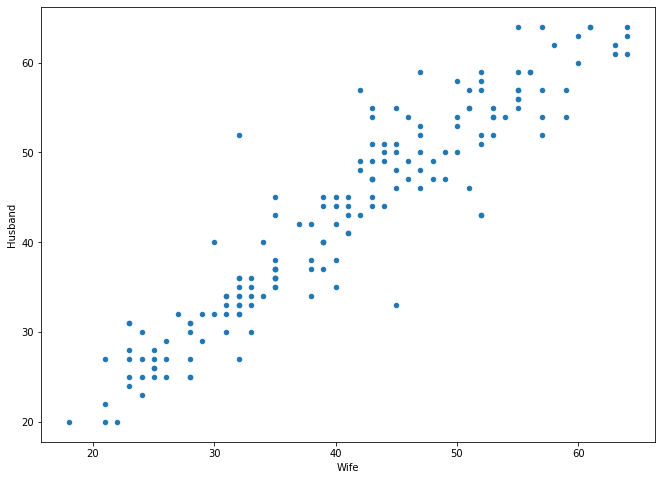

In [11]:
ages.plot.scatter(x='Wife',y='Husband')

Text(0.5, 1.0, 'Age at marriage')

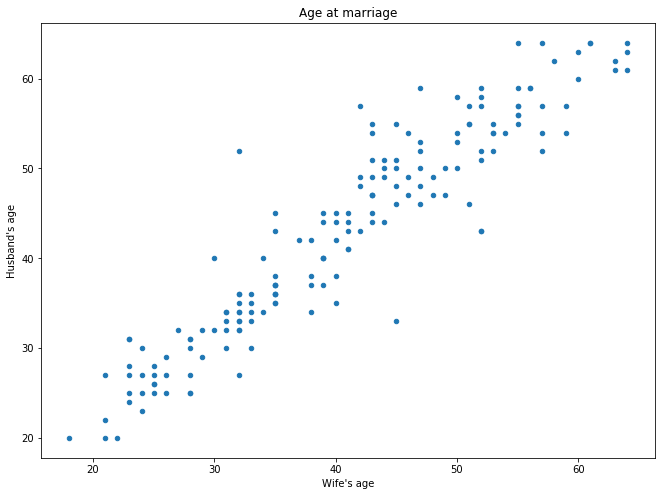

In [12]:
ages.plot.scatter(x='Wife',y='Husband')
ax = plt.gca()
ax.set_xlabel("Wife's age")
ax.set_ylabel("Husband's age")
ax.set_title('Age at marriage')

where we used **plt.gca()** to get a reference to the current Axes object generated by **pandas** that we were then free to customize using standard **matplotlib** commands. 

We can even add other plots to the axis object returned by **pandas**

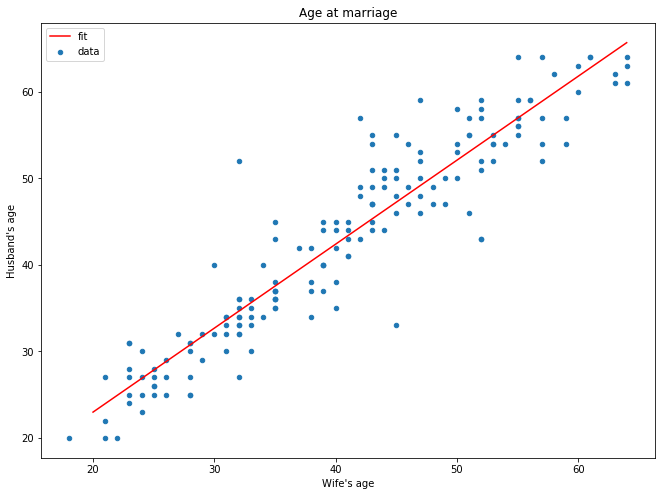

In [13]:
fit_x = np.arange(20,65)
fit_y = 3.59+0.97*fit_x

ages.plot.scatter(x='Wife',y='Husband')
ax = plt.gca()
ax.set_xlabel("Wife's age")
ax.set_ylabel("Husband's age")
ax.set_title('Age at marriage')
ax.plot(fit_x, fit_y, 'r-')
ax.legend(['fit', 'data'])

# Bar plot

**matplotlib** supports several basic types of plots out of the box. To illustrate the bar plot we will use some made up data:

In [14]:
dataLA = [20, 14, 23]
dataSF = [11, 18, 28]

pos = np.arange(0, 5, 2)
width = 0.5

Here we have two different datasets with 3 data points (classes) each. We could simply call **plt.bar** to generate the figure, similarly to what we did just above. In this case, we will take this opportunity to illustrate how to use **subplots** and the figure/axes interface in a relatively simple example. Afterward we will use this same interface to build more sophisticated examples.

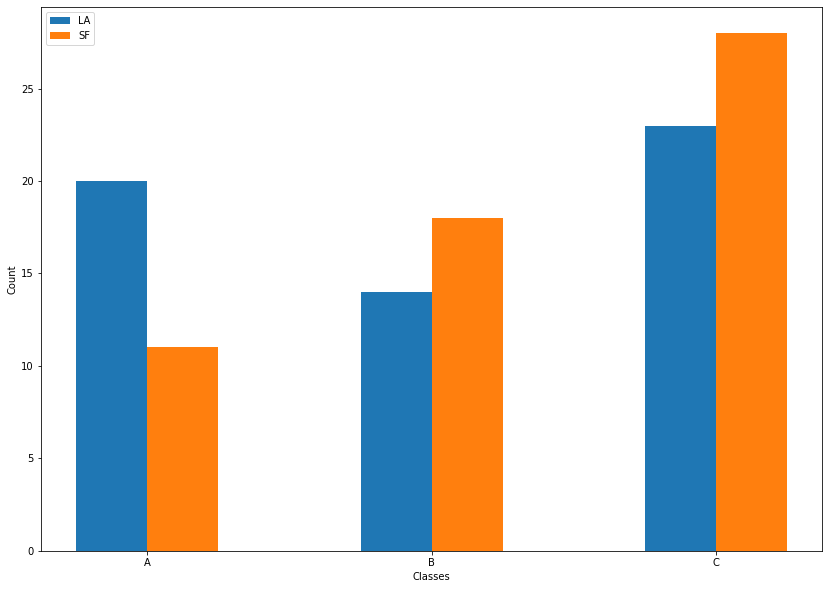

In [15]:
fig, ax = plt.subplots(1)
fig.set_size_inches(14,10)

ax.bar(pos, dataLA, width=width, label="LA")
ax.bar(pos+width, dataSF, width=width, label="SF")

ax.set_ylabel('Count')
ax.set_xlabel('Classes')
ax.set_xticks(pos + width / 2)
ax.set_xticklabels(('A', 'B', 'C'))

ax.legend()

# Pie plot

Here we use the **figsize** parameter to **plt.figure** to set the figure size in inches. Notice that this is slightly different than what we did above.

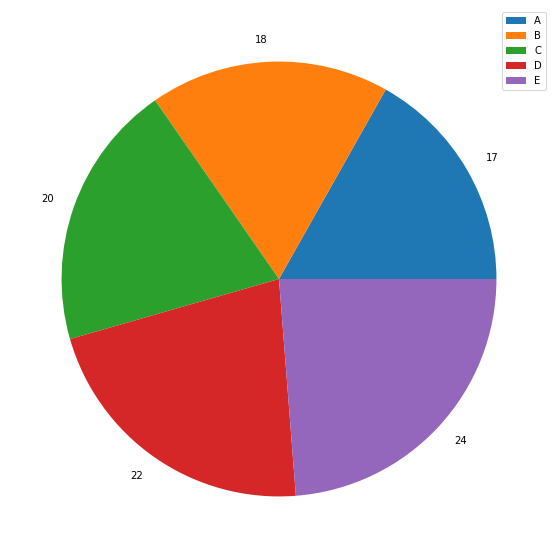

In [16]:
data = [17, 18, 20, 22, 24]

fig = plt.figure(figsize=(10,10))
ax = plt.gca()

ax.pie(data, labels=data)
ax.legend(["A", "B", "C", "D", "E"])

# Comparison of Pie and Bar plots

As we discussed, you should avoid using pie plots in most cases. This is specially true when the values of each wedge are very similar. To illustrate this point let's make up some data:

In [17]:
dataA = [17, 18, 20, 22, 24]
dataB = [20, 20, 19, 21, 20]
dataC = [24, 22, 20, 18, 17]

We'll plot these three datasets using both bar and pie plots. As we want to make sure we use the same colors for the corresponding bar/slice, we start by explicitly obtaining the color cycle

In [18]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print(colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


Now we can supply the right color sequence to use for the bars

(0, 25)

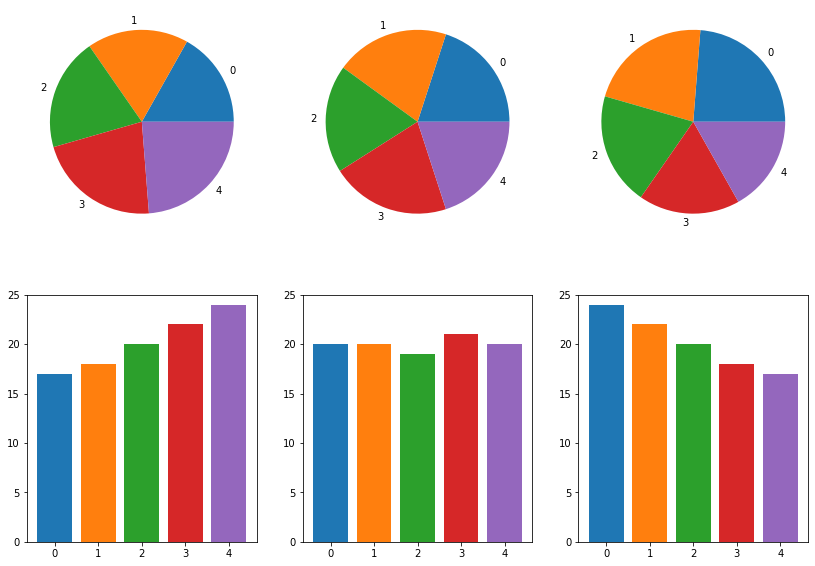

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(14,10)

axs[0][0].pie(dataA, labels=range(5))
axs[0][1].pie(dataB, labels=range(5))
axs[0][2].pie(dataC, labels=range(5))

axs[1][0].bar(x=range(5), height=dataA, color=colors)
axs[1][0].set_ylim(0, 25)
axs[1][1].bar(x=range(5), height=dataB, color=colors)
axs[1][1].set_ylim(0, 25)
axs[1][2].bar(x=range(5), height=dataC, color=colors)
axs[1][2].set_ylim(0, 25)

As you can see, the differences are much more easily seen in the bar plots! This is also a nice illustration of how you can easily combine multiple different subplots into a compelling figure

Notice also, that, by default the matplotlib bar function uses the same color for all the bars in the same data series while it uses a different color for each pie slidce. We got around this by setting the colors of each bar manually. To make sure that the colors matched the ones used in the pie plots, we manually obtained the colors from the color cycle that matplotlib lib uses. 

A similar effect could have been obtained by calling **plt.bar** for each individual bar:

<BarContainer object of 1 artists>

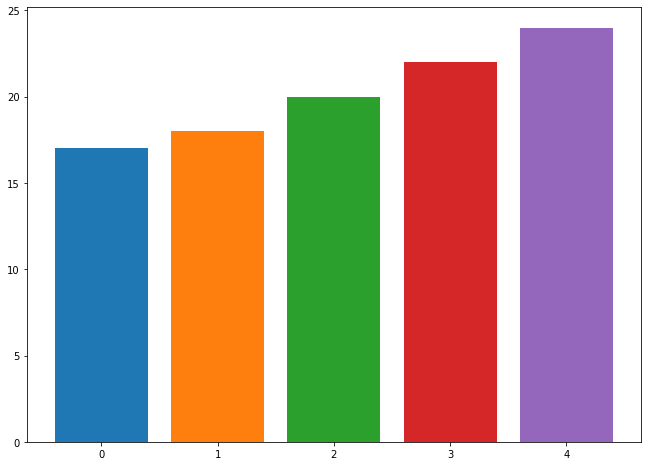

In [20]:
plt.bar(x=0, height=17)
plt.bar(x=1, height=18)
plt.bar(x=2, height=20)
plt.bar(x=3, height=22)
plt.bar(x=4, height=24)

# Patches

**matplotlib** also includes support for different types of shapes, called **patches**, such as Circle, Rectangle, Arrow, etc..

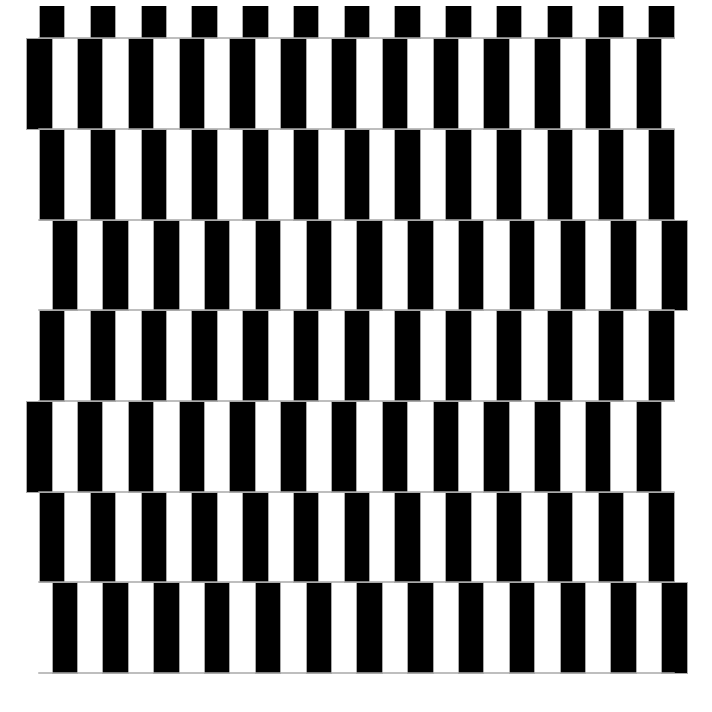

In [21]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()

squares = []

for i in range(8):
    ax.plot([0, 25], [i, i], 'darkgrey')
    
    for j in range(0, 26, 2):
        sq = Rectangle((j+0.5*np.sin((i+1)*np.pi/2), i), 1, 1, fill=True)
        squares.append(sq)

pc = PatchCollection(squares, facecolor='black', edgecolor='darkgrey')
ax.add_collection(pc)
ax.axis('off')
fig.tight_layout()

It should be noted that Patches are not plotted directly. Instead a list of patches is added to a **PatchCollection** object that is then plotted by using **ax.add_collection**. 

# Bubble plot

We've covered the most fundamental functionality of **matplotlib**. With some creativity, we're already able to create some sophisticated types of visualizations. Let's start by loading some data:

In [22]:
data = pd.read_csv('data/gapminder.csv')

And define some useful arrays.

In [23]:
colors = np.array([
    '#5A6FFA',
    '#E60DA1',
    "#7E7E7E",
    "#B7F025",
    "#FF9A1E"])

continents = [
    'Africa',
    'Americas',
    'Asia',
    'Europe',
    'Oceania']

Let's take a look at the data

In [24]:
data.head()

,Country,GDP,Population,LifeExpectancy,Continent
0,Algeria,6223.367465,33333216,72.301,0
1,Angola,4797.231267,12420476,42.731,0
2,Benin,1441.284873,8078314,56.728,0
3,Botswana,12569.851770,1639131,50.728,0
4,Burkina Faso,1217.032994,14326203,52.295,0


As we can see, there are several features associated with each country. Here we will create a Bubble plot to encode all 4 features in a single plot:

-  GDP - x-axis, log scale
-  Life Expectancy - y-axis
-  Population - bubble size/area
-  Continent - bubble color

Finally, we will manually add a legend using **ax.text** to write the name of each continent with the respective color. 

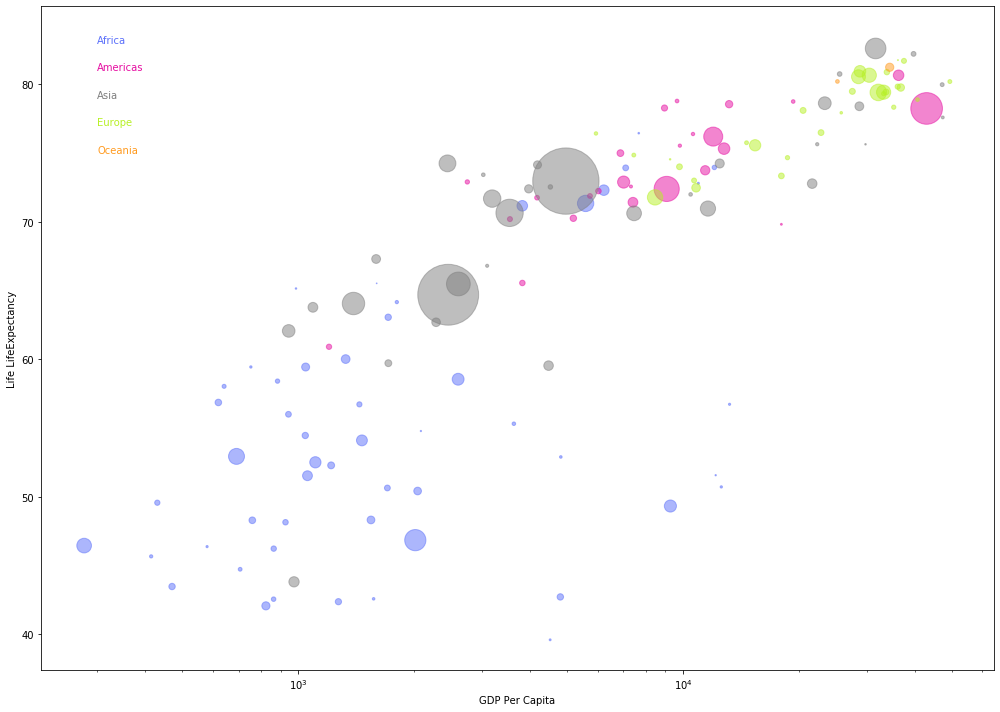

In [25]:
fig = plt.figure()
ax = plt.gca()

fig.set_size_inches(14,10)

for i in range(5):
    continent = data[data['Continent']==i]
    ax.scatter(continent['GDP'], continent['LifeExpectancy'], 
               s=(continent['Population'])/300000, 
               c=colors[i], alpha=0.5)

ax.set_xscale('log')

for i in range(len(continents)):
    ax.text(300, 83-i*2, continents[i], color=colors[i])

ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Life LifeExpectancy')

fig.tight_layout()

This kind of plot was made famoous by Hans Rosling, one of the great science communicators of our time, during his Gapminder Foundation work.

# Age pyramid

Another well known plot type that we can easily build is age pyramids. Let's start by loading some data:

In [26]:
pyramid = pd.read_csv('data/pyramid.csv')

In [27]:
pyramid.head()

,Age,Female,Male,Male_Inverse,OBJECTID
0,0 - 10,113083,114153,-114153,0
1,10 - 20,88861,80755,-80755,1
2,20 - 30,130033,120694,-120694,2
3,30 - 40,66020,92146,-92146,3
4,40 - 50,28289,45107,-45107,4


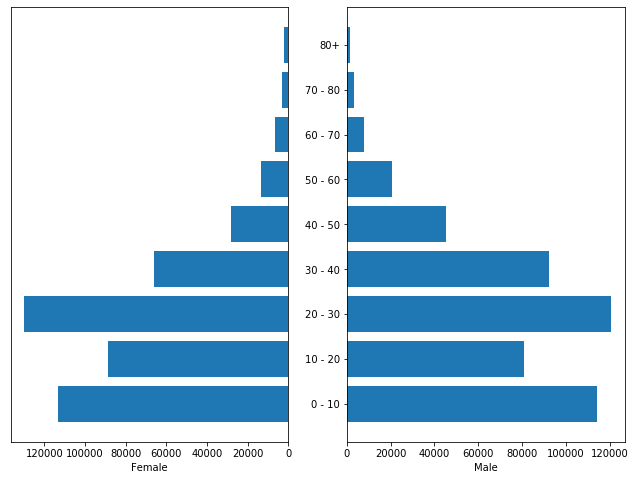

In [28]:
fig, axs = plt.subplots(1, 2, sharey=False, sharex=False)
axs[0].barh(range(9), pyramid['Female'])
axs[1].barh(range(9), pyramid['Male'])

axs[0].invert_xaxis()
axs[0].set_yticks([])
axs[0].set_yticklabels('')

axs[1].set_yticks(range(9))
axs[1].set_yticklabels(pyramid['Age'])

axs[0].set_xlabel('Female')
axs[1].set_xlabel('Male')

fig.subplots_adjust(wspace=0.21)

Here we used **barh** the horizontal version of the bar plots, and **invert_axis** to flip the direction of the *x-axis* in the first subplot.

# Candle stick plots

A very common type of plot in finance is the Candle stick plot. We start by loading weekly values for the DJIA.

In [29]:
djia = pd.read_csv('data/DJIA.csv')

Let's keep only the last 52 points (1 year) for clarity of the figure

In [30]:
djia = djia.iloc[-52:]

In [31]:
djia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
257,2018-12-05,24737.419922,25095.619141,23881.369141,24370.240234,24370.240234,1602570000
258,2018-12-12,24509.089844,24828.289063,23456.880859,23675.640625,23675.640625,1936050000
259,2018-12-19,23693.330078,24057.339844,21792.199219,21792.199219,21792.199219,2289180000
260,2018-12-26,21857.730469,23381.880859,21712.529297,23327.460938,23327.460938,1466360000
261,2019-01-02,23058.609375,23864.650391,22638.410156,23787.449219,23787.449219,1793450000


Candle sticks combine bars and lines to allows to visualize __Open__, __Close__, __High__, and __Low__ values at the same time

In [32]:
opens = djia['Open'].values
closes = djia['Close'].values
highs = djia['High'].values
lows = djia['Low'].values

We start by calculating the change between the open and close values. This will correspond to the height of our bars

In [33]:
changes = closes-opens

Positive changes will be depicted in green and negative changes in red, so we split our dataset.

In [34]:
ups = changes>0
downs = ~ups

For convenience we also generate an array for the positions of the bars

In [35]:
pos = np.arange(djia.shape[0])

And define the coordinates of the lines. The line for each candle stick goes from High to Low. We can plot multiple lines at the same time by providing a 2D array of X and Y coordinates to __plt.plot__, in which case, a line will be plotted for each column. We generate these arrays now

In [36]:
x = np.vstack([pos, pos])
y = np.vstack([highs, lows])

In [37]:
y.shape

(2, 52)

Finally, we explictly use __zorder__ to make sure that the lines stay __below__ the bars

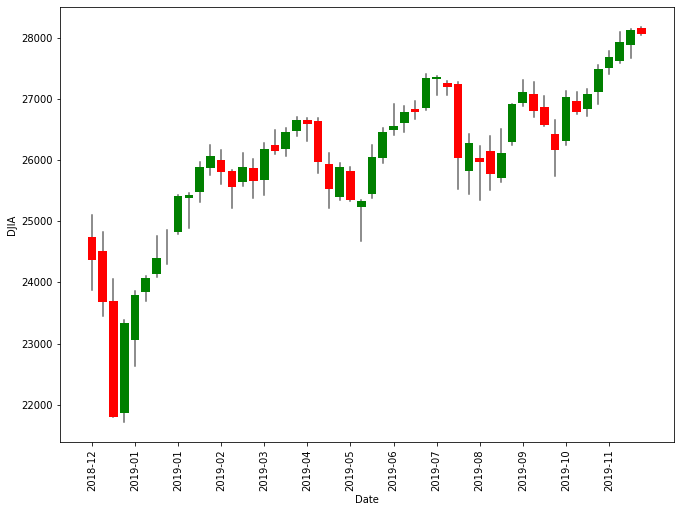

In [38]:
fig, ax = plt.subplots(1)

ax.bar(x=pos[ups], height=changes[ups], bottom=opens[ups], color='g', zorder=2)
ax.bar(x=pos[downs], height=-changes[downs], bottom=closes[downs], color='r', zorder=2)
ax.plot(x, y, color='dimgray', zorder=1)

ax.set_xticks(pos[::4])
ax.set_xticklabels([date[:7] for date in djia['Date'].values[::4]], rotation=90)
ax.set_xlabel('Date')
ax.set_ylabel('DJIA');

# Conclusion
We have now learnt how to generate various types of graphs and figures. We have also compared them and and seen the relevance of each type of graph, when to use it. Further, we have seen how to manipulate images and convert them to various forms which may be needed if we aim  to process the images.